In [ ]:
!pip install pycebox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3640 sha256=1e878e264121b948a7c7ac7a37b51ad4479db9bc56b901a023cfad92f4609c9b
  Stored in directory: /root/.cache/pip/wheels/cc/0d/0a/06236a41d8f5c3485c1057262de55329e227a0c239fd00d0cd
Successfully built pycebox


In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import pycebox.ice as icebox
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd
from pdpbox import info_plots
import numpy as np

In [ ]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from pylab import rcParams
from xgboost import plot_importance
from sklearn.svm import SVR

In [ ]:
raw_data = load_diabetes()

In [ ]:
df = pd.DataFrame(np.c_[raw_data['data'], raw_data['target']], columns=np.append(raw_data['feature_names'], ['target']))

In [ ]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [ ]:
y = df.target
X = df.drop('target', axis=1)

In [ ]:
clf = SVR()

In [ ]:
clf.fit(X, y)

SVR()

### Calculate the feature importance

In [ ]:
from pycebox.ice import ice, ice_plot

In [ ]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).head()
bmi_ice_df = icebox.ice(data=X, column='bmi', predict=clf.predict)

Text(0.5, 0, 'BMI')

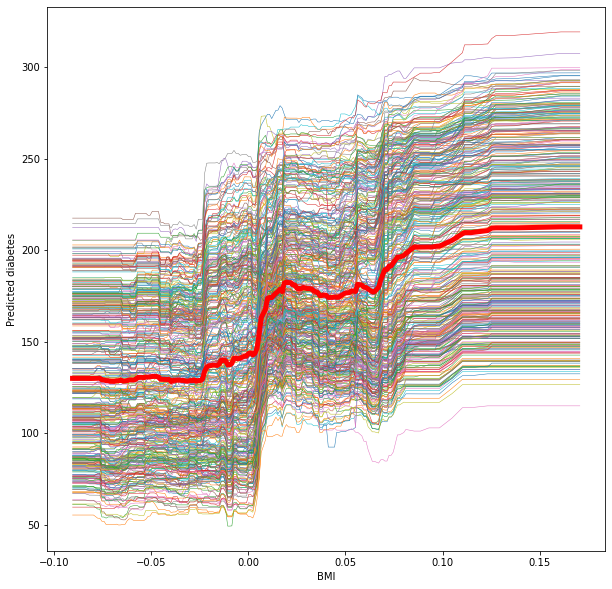

<Figure size 1080x1080 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.figure(figsize=(15,15))
icebox.ice_plot(bmi_ice_df, linewidth=.5, plot_pdp=True, pdp_kwargs={'c':'red', 'linewidth':5}, ax=ax)
ax.set_ylabel('Predicted diabetes')
ax.set_xlabel('BMI')

In [ ]:
ice_df = ice(data=X, column='age', predict = clf.predict)

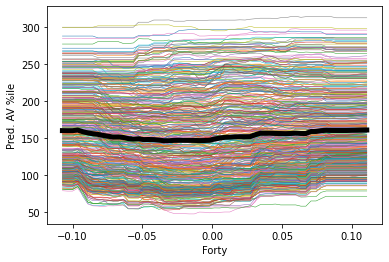

In [ ]:
ice_plot(ice_df, linewidth=.5, plot_pdp=True, 
         pdp_kwargs={'c': 'k', 'linewidth': 5})
plt.ylabel('Pred. AV %ile')
plt.xlabel('Forty');

In [ ]:
predictions = clf.predict(X)

In [ ]:
dt = DecisionTreeRegressor(random_state=100, max_depth=3)

In [ ]:
dt.fit(X, predictions)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

In [ ]:
feat_importances.sort_values(ascending=False).head()

Glucose                       0.300254
bmi                           0.173276
age                           0.102078
pregnancies                   0.095264
Diabetes_Pedigree_Function    0.092385
dtype: float32

In [ ]:
clf = RandomForestRegressor(random_state=42, n_estimators=50, n_jobs=-1)

In [ ]:
clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
bmi_ice_df = icebox.ice(data=X, column='Glucose', predict=clf.predict)

Text(0.5, 0, 'Glucose')

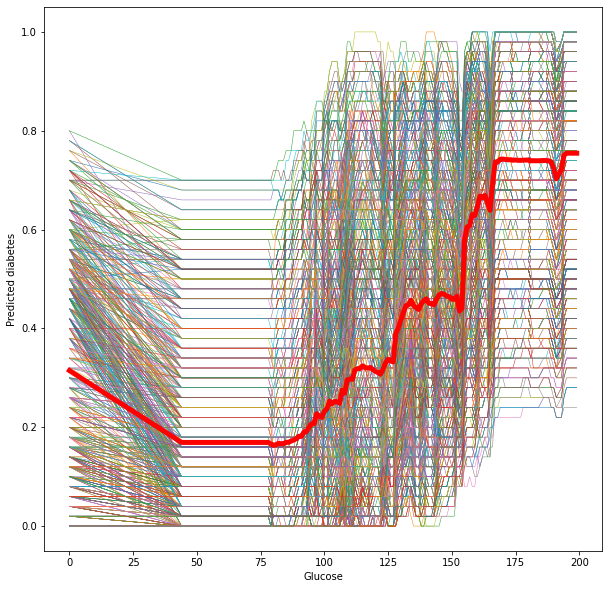

<Figure size 1080x1080 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.figure(figsize=(15,15))
icebox.ice_plot(bmi_ice_df, linewidth=.5, plot_pdp=True, pdp_kwargs={'c':'red', 'linewidth':5}, ax=ax)
ax.set_ylabel('Predicted diabetes')
ax.set_xlabel('Glucose')

In [ ]:
bmi_ice_bmi = icebox.ice(data=X, column='bmi', predict=clf.predict)

Text(0.5, 0, 'bmi')

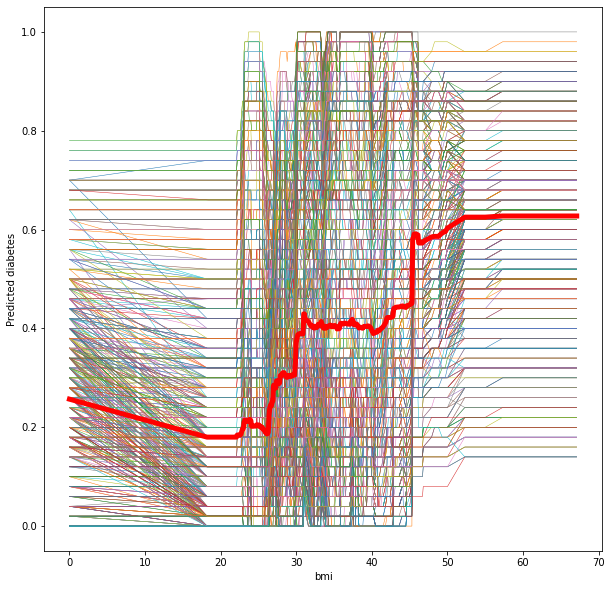

<Figure size 1080x1080 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.figure(figsize=(15,15))
icebox.ice_plot(bmi_ice_bmi, linewidth=.5, plot_pdp=True, pdp_kwargs={'c':'red', 'linewidth':5}, ax=ax)
ax.set_ylabel('Predicted diabetes')
ax.set_xlabel('bmi')

In [ ]:
bmi_ice_age = icebox.ice(data=X, column='age', predict=clf.predict)

Text(0.5, 0, 'Age')

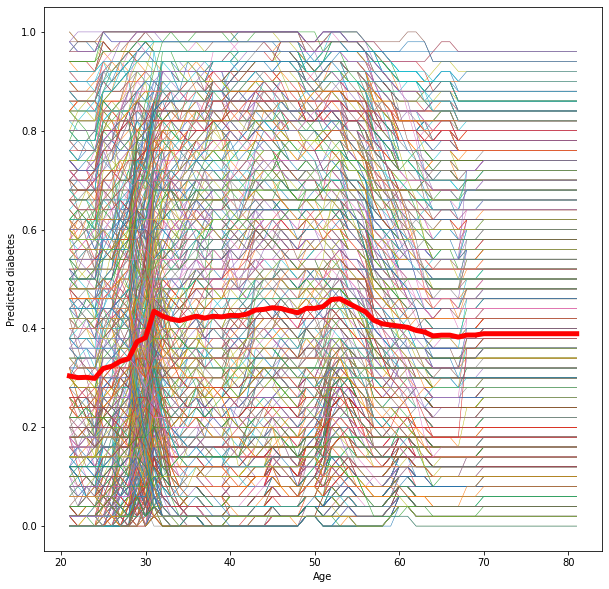

<Figure size 1080x1080 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.figure(figsize=(15,15))
icebox.ice_plot(bmi_ice_age, linewidth=.5, plot_pdp=True, pdp_kwargs={'c':'red', 'linewidth':5}, ax=ax)
ax.set_ylabel('Predicted diabetes')
ax.set_xlabel('Age')

[Text(558.0, 475.65000000000003, 's5 <= -0.004\nmse = 4055.893\nsamples = 442\nvalue = 152.345'),
 Text(279.0, 339.75, 'bmi <= 0.006\nmse = 1793.689\nsamples = 218\nvalue = 111.426'),
 Text(139.5, 203.85000000000002, 's3 <= 0.025\nmse = 965.478\nsamples = 171\nvalue = 97.992'),
 Text(69.75, 67.94999999999999, 'mse = 1193.493\nsamples = 91\nvalue = 108.497'),
 Text(209.25, 67.94999999999999, 'mse = 437.788\nsamples = 80\nvalue = 86.042'),
 Text(418.5, 203.85000000000002, 'bp <= 0.024\nmse = 1761.652\nsamples = 47\nvalue = 160.3'),
 Text(348.75, 67.94999999999999, 'mse = 1151.053\nsamples = 32\nvalue = 147.762'),
 Text(488.25, 67.94999999999999, 'mse = 2013.367\nsamples = 15\nvalue = 187.049'),
 Text(837.0, 339.75, 'bmi <= 0.015\nmse = 3041.966\nsamples = 224\nvalue = 192.169'),
 Text(697.5, 203.85000000000002, 'bmi <= -0.023\nmse = 2042.661\nsamples = 116\nvalue = 162.802'),
 Text(627.75, 67.94999999999999, 'mse = 1386.356\nsamples = 41\nvalue = 140.916'),
 Text(767.25, 67.9499999999999

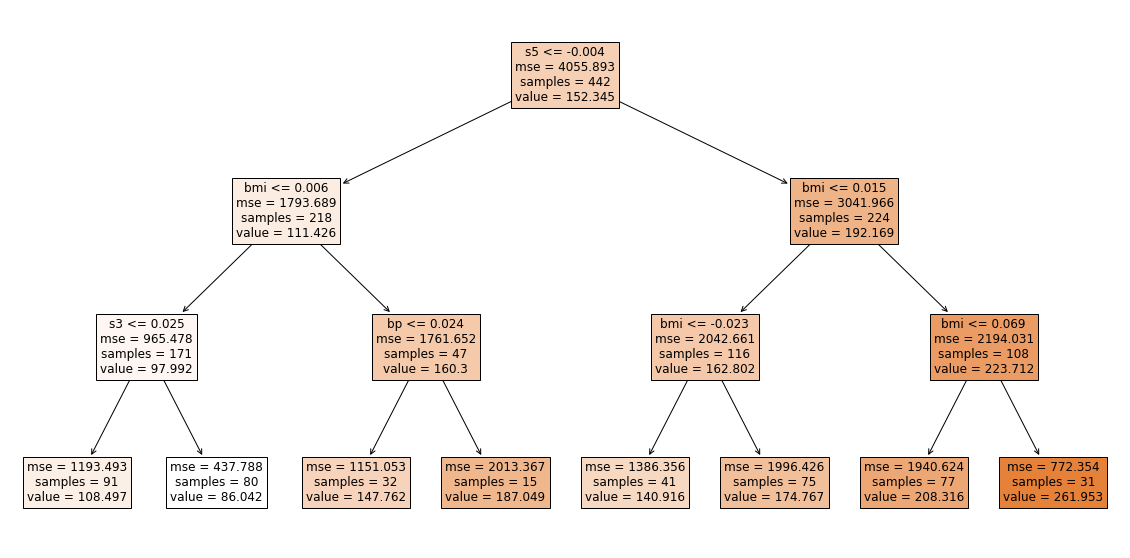

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
tree.plot_tree(dt, feature_names=list(X.columns), precision=3,
          filled=True, fontsize=12, impurity=True)

In [ ]:
from sklearn import tree

In [ ]:
!pip install pdp

  Created wheel for pdp: filename=pdp-0.3.0-py3-none-any.whl size=6618 sha256=f20d2410d93499a156f80de1efcc5c87a7fbc8067895a672cebf0dbc9cf4e78e
  Stored in directory: /root/.cache/pip/wheels/86/3f/21/790268989f0e594527d3b781d80e150499eb918f8c88c1509a
Successfully built pdp


In [ ]:
!pip install pdpbox

     |████████████████████████████████| 34.0 MB 38 kB/s 
     |████████████████████████████████| 13.1 MB 6.5 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=55aaa504bda1a170cabefaebfa334b5f5bebc8ff6511c3baed313361d417c0c4
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Interpretable Learning /pdp,ice/pima-indians-diabetes.csv"
dataset = loadtxt(path, delimiter=',')

In [ ]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Interpretable Learning /pdp,ice/pima-indians-diabetes.csv')
print(df.head())

   6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0


In [ ]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 767 rows and 9 columns


In [ ]:
df.columns = ["pregnancies", "Glucose", "blood_pressure", "skin_thickness","insulin","bmi","Diabetes_Pedigree_Function","age","outcome"]
df.head()

,pregnancies,Glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
X = df[["pregnancies", "Glucose", "blood_pressure", "skin_thickness","insulin","bmi","Diabetes_Pedigree_Function","age"]]
y = df[["outcome"]]

In [ ]:
X = df[:,0:8]
y = df[:, 8]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print('Accuracy : %.2f%%' %(accuracy * 100.0))

Accuracy : 77.27%


In [ ]:
value = [1, 161, 72, 35, 0, 28.1, 0.527, 20]

In [ ]:
l = model.predict_proba(value)
print('No diabetes: {:.2%}\n Yes diabetes: {:.2%}'.format(l[0][0],l[0][1]))

No diabetes: 69.09%
 Yes diabetes: 30.91%


In [ ]:
rcParams['figure.figsize'] = 10, 10

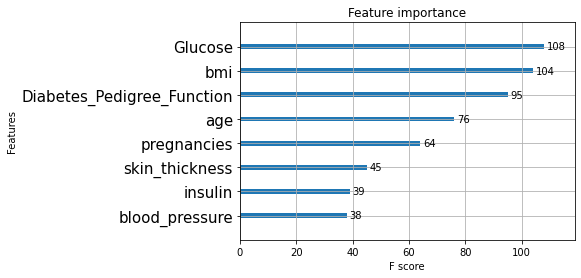

In [ ]:
plot_importance(model)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
dataset = df
pima_features = dataset.columns[:8]
pima_target = dataset.columns[8]

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


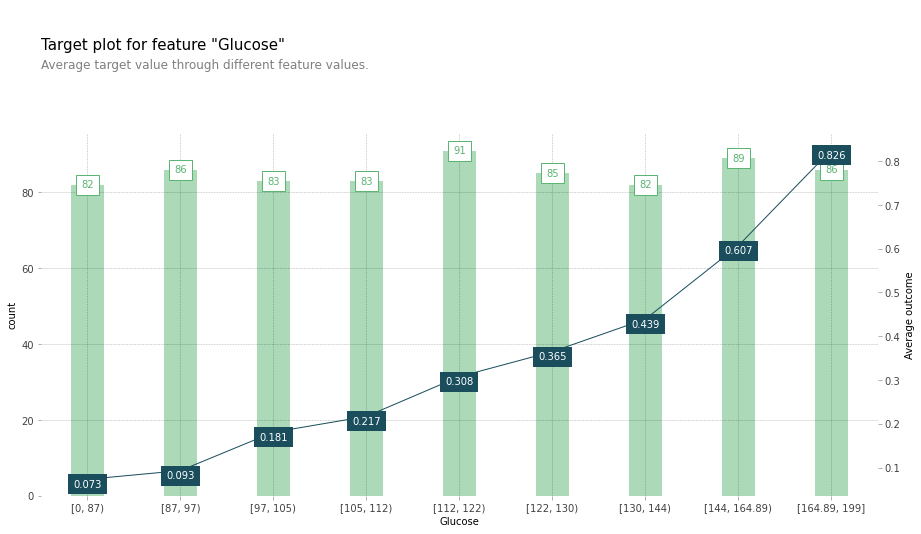

In [ ]:
fig, axes, summary_df = info_plots.target_plot(
    df = df,
    feature = 'Glucose',
    feature_name = 'Glucose',
    target = pima_target
)

In [ ]:
summary_df

,x,display_column,value_lower,value_upper,count,outcome
0,0,"[0, 87)",0.000000,87.000000,82,0.073171
1,1,"[87, 97)",87.000000,97.000000,86,0.093023
2,2,"[97, 105)",97.000000,105.000000,83,0.180723
3,3,"[105, 112)",105.000000,112.000000,83,0.216867
4,4,"[112, 122)",112.000000,122.000000,91,0.307692
5,5,"[122, 130)",122.000000,130.000000,85,0.364706
6,6,"[130, 144)",130.000000,144.000000,82,0.439024
7,7,"[144, 164.89)",144.000000,164.888889,89,0.606742
8,8,"[164.89, 199]",164.888889,199.000000,86,0.825581


/usr/local/lib/python3.7/dist-packages/pdpbox/info_plots.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_df['actual_prediction'] = prediction[:, 1]
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


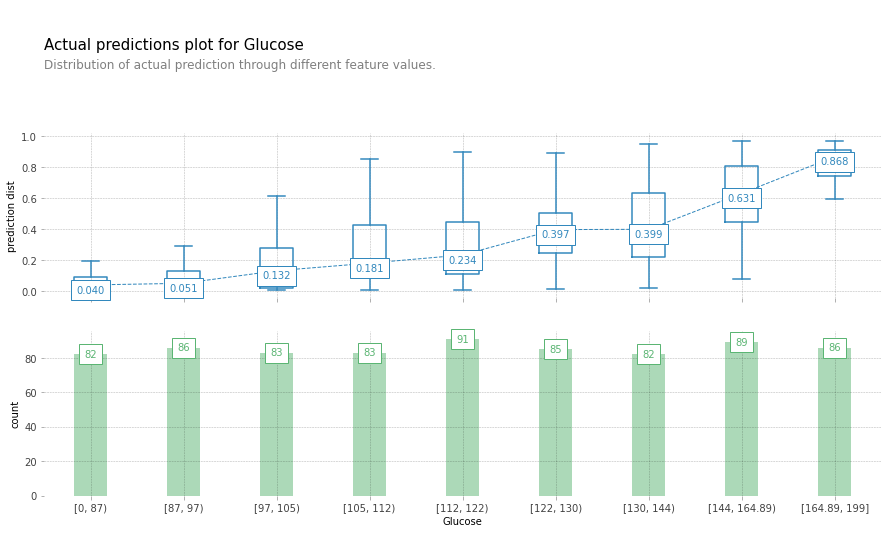

In [ ]:
fig, axes, summary_df = info_plots.actual_plot(
    model = model,
    X = df[pima_features],
    feature = 'Glucose',
    feature_name = 'Glucose',
    predict_kwds={}
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


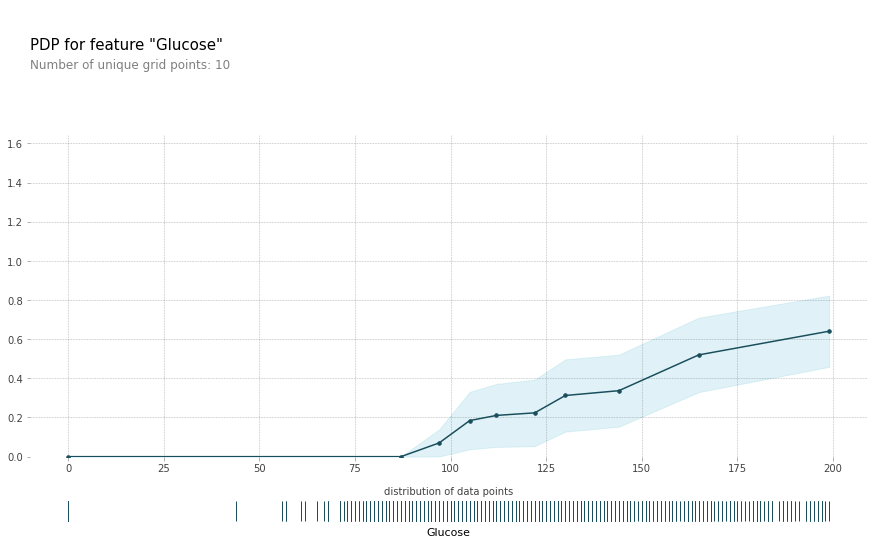

In [ ]:
pdp_gc = pdp.pdp_isolate(
    model = model,
    dataset = df,
    model_features=pima_features,
    feature = 'Glucose'
)
fig, axes = pdp.pdp_plot(
    pdp_gc,
    'Glucose',
    plot_lines=False,
    frac_to_plot=0.5,
    plot_pts_dist = True
)

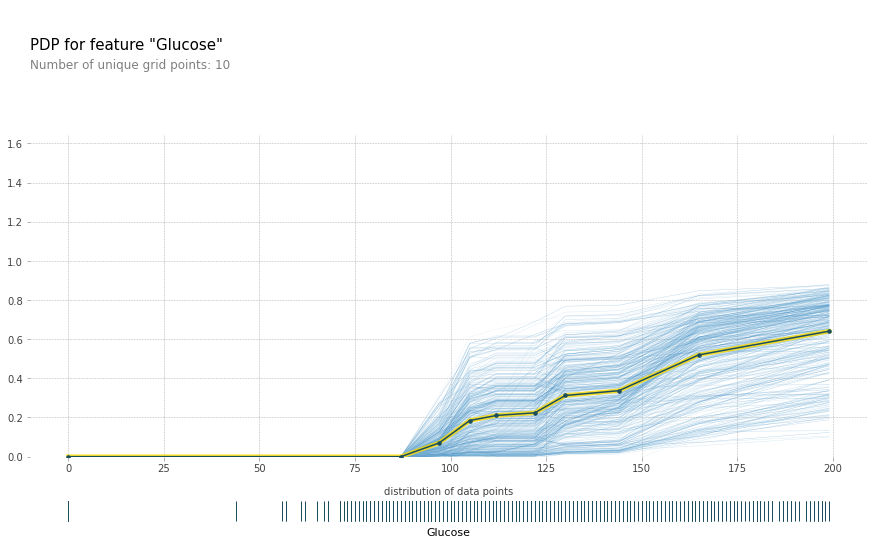

In [ ]:
pdp_gc = pdp.pdp_isolate(
    model = model,
    dataset = df,
    model_features=pima_features,
    feature = 'Glucose'
)
fig, axes = pdp.pdp_plot(
    pdp_gc,
    'Glucose',
    plot_lines=True,
    frac_to_plot=0.5,
    plot_pts_dist = True
)

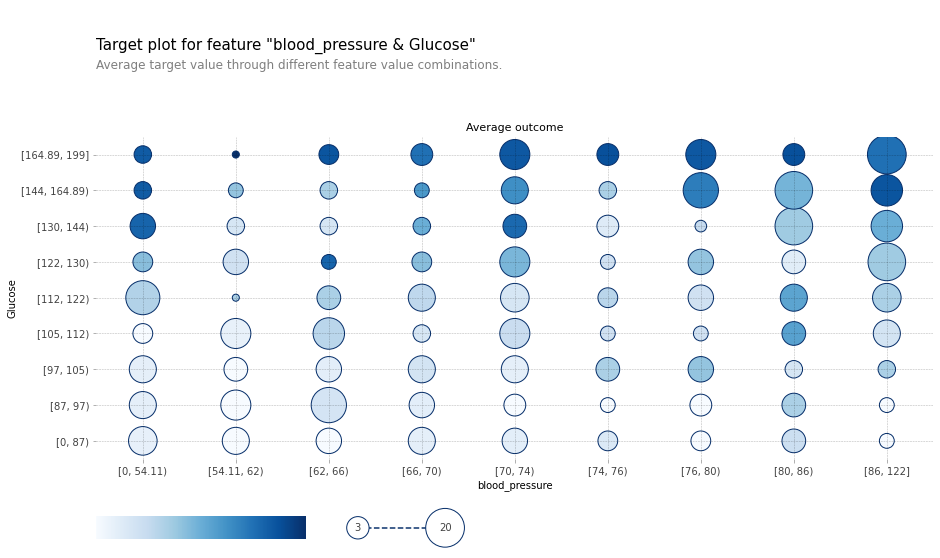

In [ ]:
fig, axes, summary_df = info_plots.target_plot_interact(
    df = df,
    features = ['blood_pressure', 'Glucose'],
    feature_names = ['blood_pressure', 'Glucose'],
    target = pima_target
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


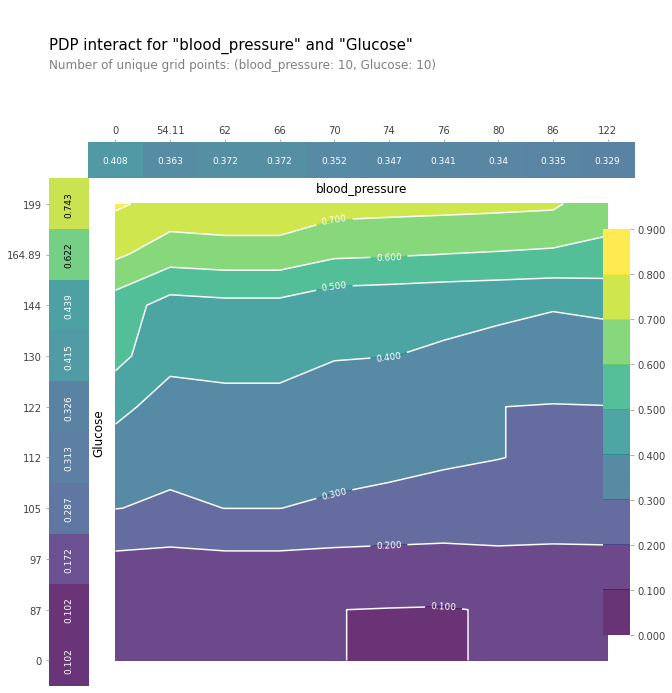

In [ ]:
pdp_interaction = pdp.pdp_interact(
    model = model,
    dataset = df,
    model_features = pima_features,
    features = ['blood_pressure', 'Glucose']
)
fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out = pdp_interaction,
    feature_names = ['blood_pressure', 'Glucose'],
    plot_type = 'contour',
    x_quantile = True,
    plot_pdp = True
)

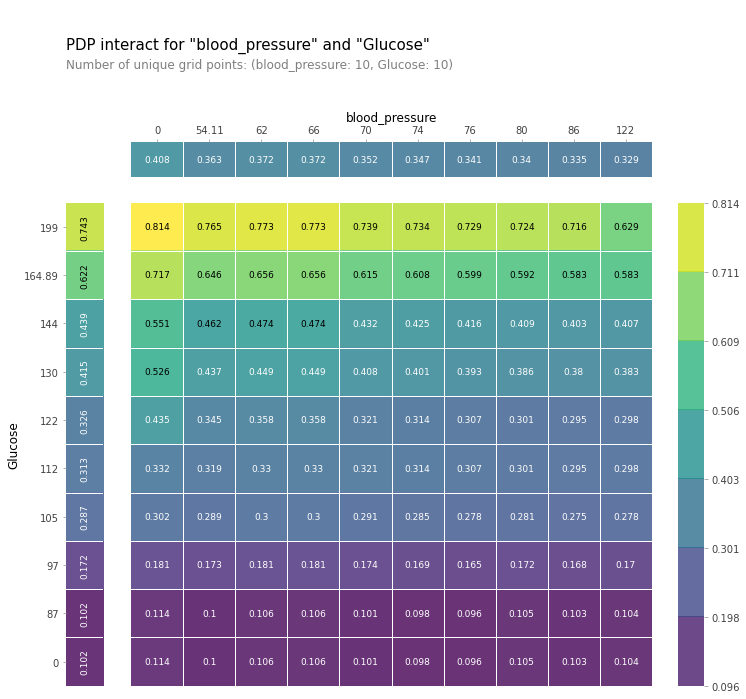

In [ ]:
pdp_interaction = pdp.pdp_interact(
    model = model,
    dataset = df,
    model_features = pima_features,
    features = ['blood_pressure', 'Glucose']
)
fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out = pdp_interaction,
    feature_names = ['blood_pressure', 'Glucose'],
    plot_type = 'grid',
    x_quantile = True,
    plot_pdp = True
)

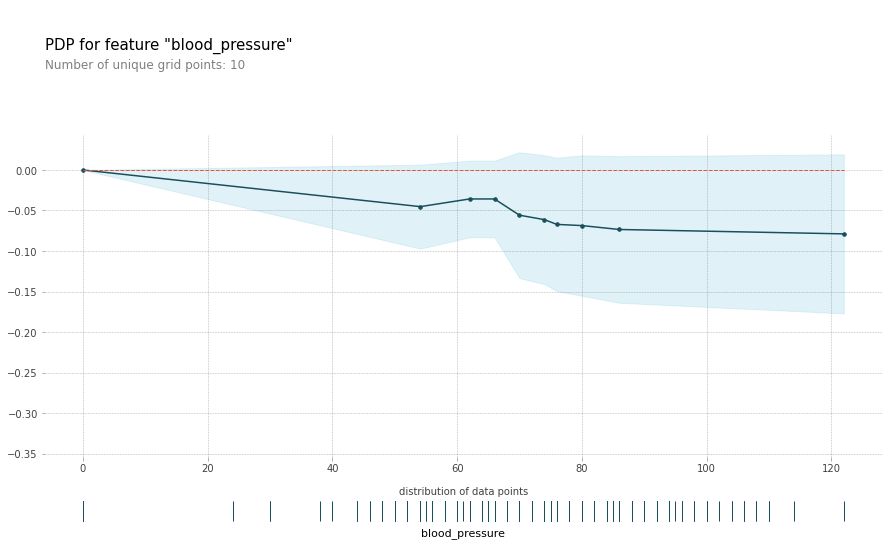

In [ ]:
pdp_bp = pdp.pdp_isolate(
    model = model,
    dataset = df,
    model_features = pima_features,
    feature = 'blood_pressure'
)
fig, axes = pdp.pdp_plot(pdp_bp,
                         'blood_pressure',
                         plot_lines = False,
                         frac_to_plot = 0.5,
                         plot_pts_dist = True)